# CreditCard Fraud Detection

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from pylab import rcParams
import itertools

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Analysis

In [4]:
data.isnull().values.any()

False

In [5]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Now plot Transaction class distribution

Text(0, 0.5, 'Fraquency')

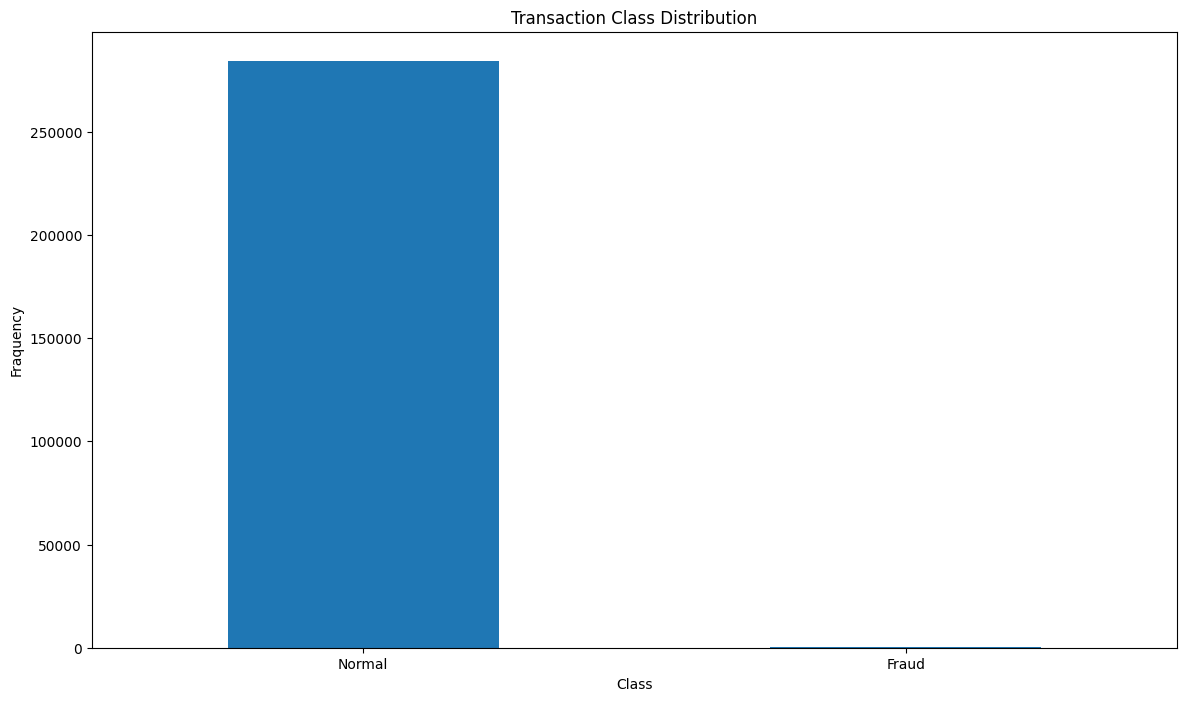

In [6]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

From the above figure we can see that this is an extremely imbalanced dataset

In [7]:
## separate the Fraud and the Normal dataset for future reference
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [8]:
# Statistics of Amount of Fraud Transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# Statistics of Amount of Normal Transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

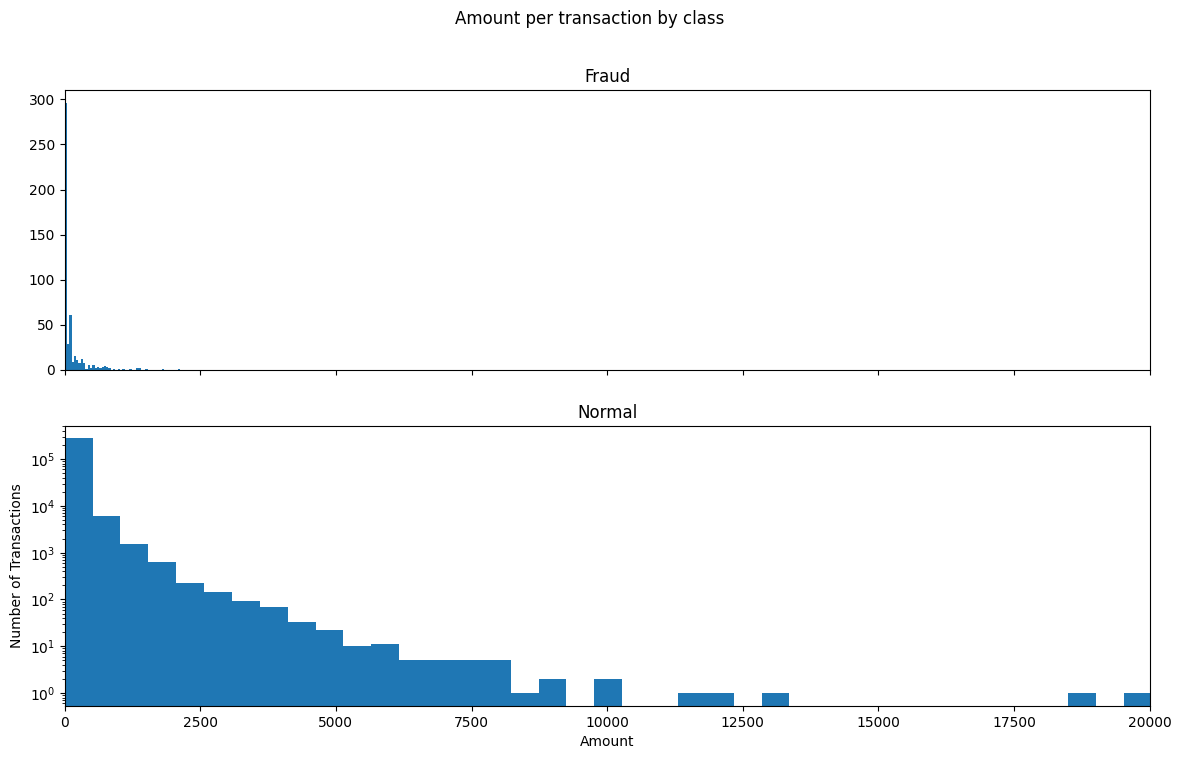

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(Fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

Now let's check how many fraudulent transaction occur in difference time frame

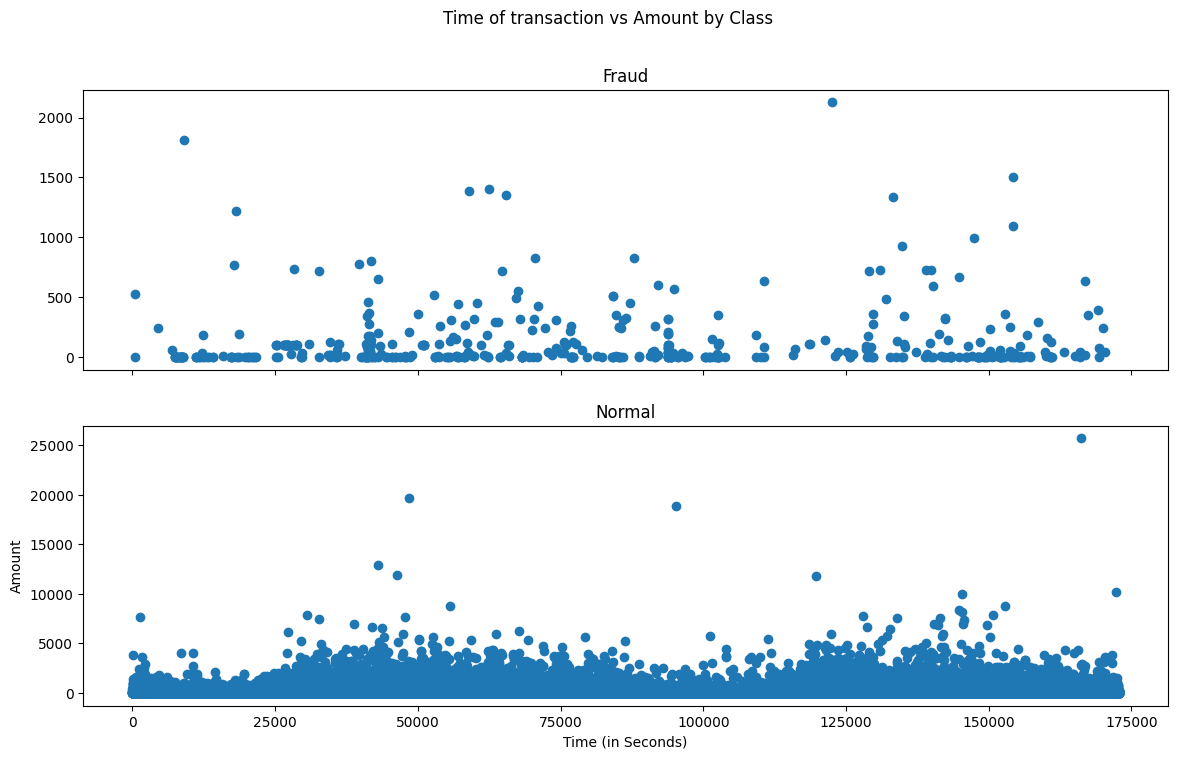

In [11]:
# Create 2 graphs as 2 rows and 1 common column
# between below two graphs share x-axis as common
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

# Plot time against amount for fraud transaction
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

# Plot time against amount for Normal transaction
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

# Set X-axis label and y axis label and show the result
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Data Sampling

In [12]:

# Take a sample of data
data_sample = data.sample(frac=0.2, random_state=1)
# data_sample = data

data_sample.shape

(56961, 31)

In [13]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.0015296972254457222
87
56874


In [14]:
# Create independent and dependent features

# create a list of column names
columns = data_sample.columns.to_list()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['Class','V15','V17','V24','V27','Time']]

# Define a random state
# state = np.random.RandomState(42)

X = data_sample[columns]
Y = data_sample['Class']

# print(state)
print(X.columns)
print(X.shape)
print(Y.shape)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V25', 'V26', 'V28', 'Amount'],
      dtype='object')
(56961, 25)
(56961,)


## Scaling

In [15]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(X)
X_scaled = data_scaled.transform(X)

In [16]:
X_scaled

array([[9.38635629e-01, 7.74794449e-01, 8.82407521e-01, ...,
        4.10074643e-01, 3.93704186e-01, 9.10638856e-05],
       [9.34515800e-01, 8.00659204e-01, 9.23629134e-01, ...,
        4.59597166e-01, 3.87232946e-01, 1.00729885e-04],
       [9.44593394e-01, 7.98175390e-01, 9.13609189e-01, ...,
        4.66813454e-01, 3.88555792e-01, 4.52775744e-05],
       ...,
       [9.45701896e-01, 7.91004333e-01, 9.18666426e-01, ...,
        4.28646814e-01, 3.91723141e-01, 1.48754638e-03],
       [9.36347523e-01, 7.82813656e-01, 9.21110307e-01, ...,
        5.78096881e-01, 3.85003283e-01, 2.28473693e-03],
       [9.73770843e-01, 7.82202747e-01, 9.16824897e-01, ...,
        4.03781096e-01, 3.85737586e-01, 9.85423165e-04]])

In [17]:
Y.shape

(56961,)

## Method to find min_sample

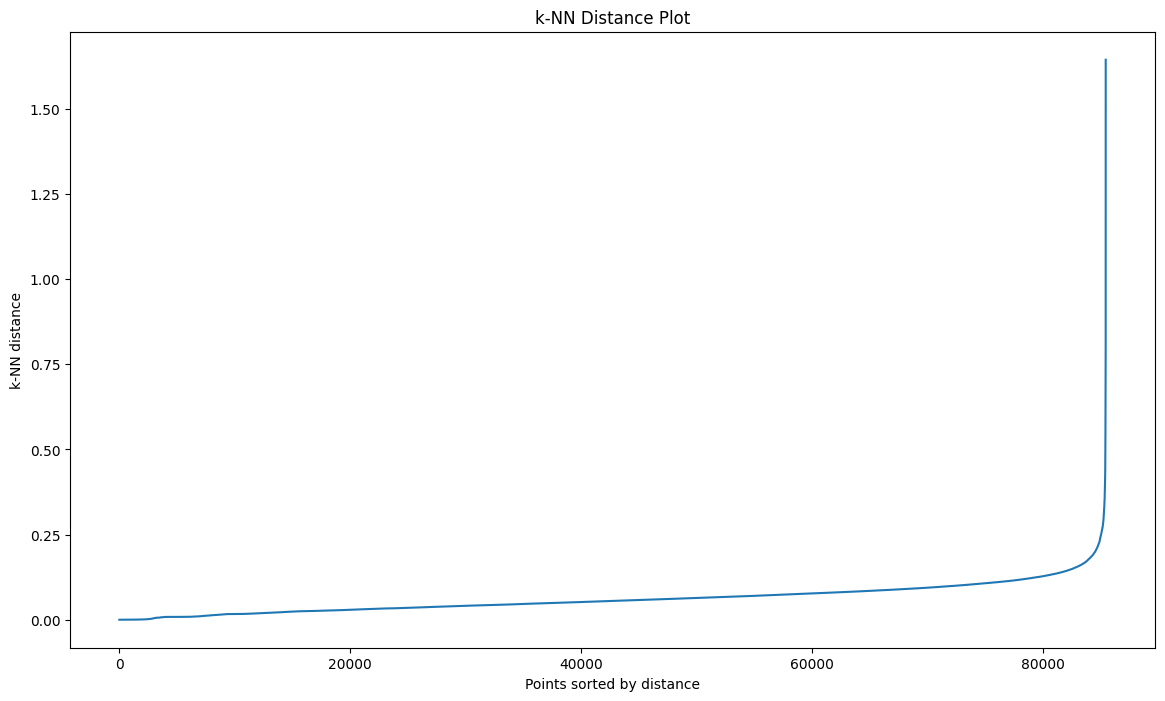

In [21]:
from sklearn.neighbors import NearestNeighbors


# Step 1: Calculate the k-nearest neighbors
k = 4  # k is usually set to min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Step 2: Sort the distances (4th column)
distances = np.sort(distances[:, k-1], axis=0)

# Step 3: Plot the distances
plt.plot(distances)
plt.ylabel('k-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-NN Distance Plot')
plt.show()

# The "elbow" point is a good candidate for `eps`

## DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
# Create DBSCAN object
# TODO: find the optimised parameters
dbscan = DBSCAN(eps=0.25, min_samples=5)

How to find the optimal eps and min sample value

In [20]:
# Fitting the model
model = dbscan.fit(X_scaled)

In [21]:
# classification result as labels
labels = model.labels_

In [22]:
# Find unique values
unique_values = np.unique(labels)

# Print unique values
print(unique_values)

[-1  0  1  2]


Can't really plot because this cannot be represented in 2D

## Conclusion

In [23]:
outlier_indices = np.where(labels == -1)[0]
print(len(outlier_indices))

277


In [24]:
"""ONLY RUN THIS ONCE"""
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
prediction = np.where(labels == -1, 1, 0)

In [25]:
class_names=np.array(['0','1']) # Binary label
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.19      0.62      0.30        87

    accuracy                           1.00     56961
   macro avg       0.60      0.81      0.65     56961
weighted avg       1.00      1.00      1.00     56961



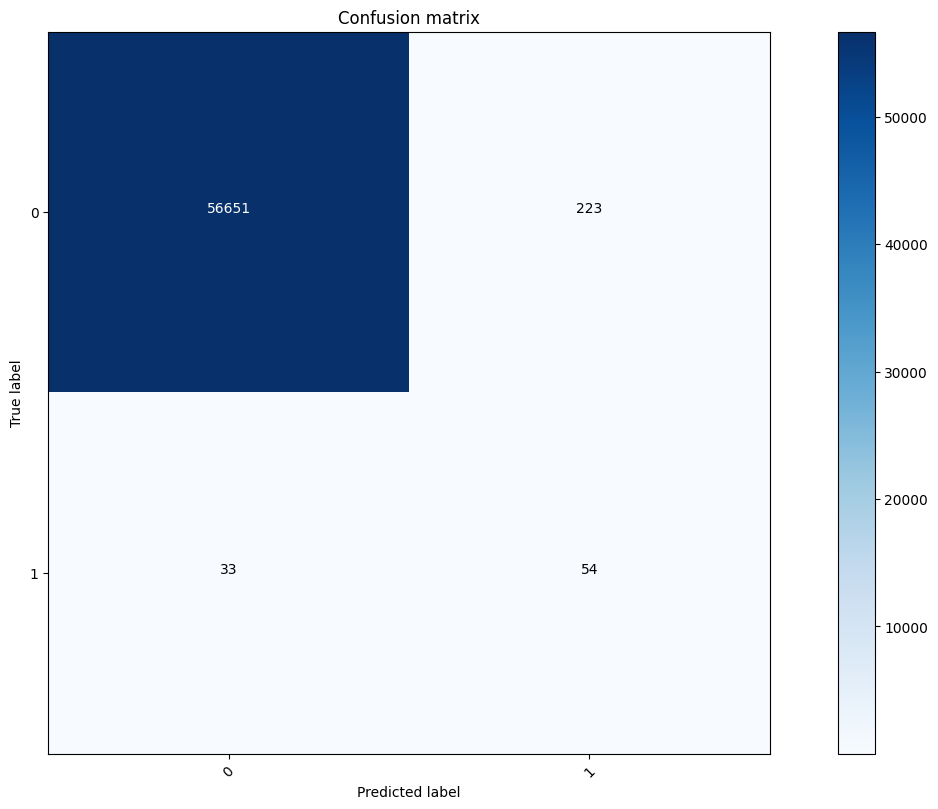

In [26]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, prediction))
cm = confusion_matrix(Y, prediction)
plot_confusion_matrix(cm,class_names)

In [27]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, prediction))
print(confusion_matrix(Y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.19      0.62      0.30        87

    accuracy                           1.00     56961
   macro avg       0.60      0.81      0.65     56961
weighted avg       1.00      1.00      1.00     56961

[[56651   223]
 [   33    54]]
